In [2]:
#加载飞桨和相关类库
import paddle
from paddle.nn import Linear
import paddle.nn.functional as F
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 设置数据读取器，API自动读取MNIST数据训练集
train_dataset = paddle.vision.datasets.MNIST(mode='train')

Cache file /Users/dsz/.cache/paddle/dataset/mnist/train-images-idx3-ubyte.gz not found, downloading https://dataset.bj.bcebos.com/mnist/train-images-idx3-ubyte.gz 
Begin to download


item 2421/2421 [============================>.] - ETA: 0s - 452us/item


Download finished
Cache file /Users/dsz/.cache/paddle/dataset/mnist/train-labels-idx1-ubyte.gz not found, downloading https://dataset.bj.bcebos.com/mnist/train-labels-idx1-ubyte.gz 
Begin to download


item 8/8 [============================>.] - ETA: 0s - 4ms/item


Download finished


<Figure size 640x480 with 0 Axes>

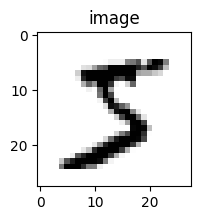

图像数据形状和对应数据为: (28, 28)
图像标签形状和对应数据为: (1,) [5]

打印第一个batch的第一个图像，对应标签数字为[5]


In [4]:
train_data0 = np.array(train_dataset[0][0])
train_label_0 = np.array(train_dataset[0][1])

# 显示第一batch的第一个图像
import matplotlib.pyplot as plt
plt.figure("Image") # 图像窗口名称
plt.figure(figsize=(2,2))
plt.imshow(train_data0, cmap=plt.cm.binary)
plt.axis('on') # 关掉坐标轴为 off
plt.title('image') # 图像题目
plt.show()

print("图像数据形状和对应数据为:", train_data0.shape)
print("图像标签形状和对应数据为:", train_label_0.shape, train_label_0)
print("\n打印第一个batch的第一个图像，对应标签数字为{}".format(train_label_0))

In [31]:
import os
os.makedirs("./work", exist_ok=True)
train_dataset[1][0].save("./work/example.png")

In [18]:
# 定义mnist数据识别网络结构，同房价预测网络
class MNIST(paddle.nn.Layer):
    def __init__(self):
        super(MNIST, self).__init__()
        
        # 定义一层全连接层，输出维度是1
        self.fc = paddle.nn.Linear(in_features=784, out_features=1)
        
    # 定义网络结构的前向计算过程
    def forward(self, inputs):
        outputs = self.fc(inputs)
        return outputs

In [19]:
# 声明网络结构
model = MNIST()

def train(model):
    # 启动训练模式
    model.train()
    # 加载训练集 batch_size 设为 16
    train_loader = paddle.io.DataLoader(paddle.vision.datasets.MNIST(mode='train'), 
                                        batch_size=16, 
                                        shuffle=True)
    # 定义优化器，使用随机梯度下降SGD优化器，学习率设置为0.001
    opt = paddle.optimizer.SGD(learning_rate=0.001, parameters=model.parameters())


In [20]:
# 图像归一化函数，将数据范围为[0, 255]的图像归一化到[0, 1]
def norm_img(img):
    # 验证传入数据格式是否正确，img的shape为[batch_size, 28, 28]
    assert len(img.shape) == 3
    batch_size, img_h, img_w = img.shape[0], img.shape[1], img.shape[2]
    # 归一化图像数据
    img = img / 255
    # 将图像形式reshape为[batch_size, 784]
    img = paddle.reshape(img, [batch_size, img_h*img_w])
    
    return img

In [21]:
import paddle
# 确保从paddle.vision.datasets.MNIST中加载的图像数据是np.ndarray类型
paddle.vision.set_image_backend('cv2')

# 声明网络结构
model = MNIST()

def train(model):
    # 启动训练模式
    model.train()
    # 加载训练集 batch_size 设为 16
    train_loader = paddle.io.DataLoader(paddle.vision.datasets.MNIST(mode='train'), 
                                        batch_size=16, 
                                        shuffle=True)
    # 定义优化器，使用随机梯度下降SGD优化器，学习率设置为0.001
    opt = paddle.optimizer.SGD(learning_rate=0.001, parameters=model.parameters())
    EPOCH_NUM = 10
    for epoch in range(EPOCH_NUM):
        for batch_id, data in enumerate(train_loader()):
            images = norm_img(data[0]).astype('float32')
            labels = data[1].astype('float32')
            
            #前向计算的过程
            predicts = model(images)
            
            # 计算损失
            loss = F.square_error_cost(predicts, labels)
            avg_loss = paddle.mean(loss)
            
            #每训练了1000批次的数据，打印下当前Loss的情况
            if batch_id % 1000 == 0:
                print("epoch_id: {}, batch_id: {}, loss is: {}".format(epoch, batch_id, avg_loss.numpy()))
            
            #后向传播，更新参数的过程
            avg_loss.backward()
            opt.step()
            opt.clear_grad()
            
train(model)
paddle.save(model.state_dict(), './mnist.pdparams')

I1115 21:28:15.396159 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.


epoch_id: 0, batch_id: 0, loss is: [28.44009]
epoch_id: 0, batch_id: 1000, loss is: [5.1984158]


I1115 21:28:15.700752 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.


epoch_id: 0, batch_id: 2000, loss is: [4.203506]


I1115 21:28:15.970801 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.


epoch_id: 0, batch_id: 3000, loss is: [2.6066608]
epoch_id: 1, batch_id: 0, loss is: [4.9460907]


I1115 21:28:16.239392 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.
I1115 21:28:16.434139 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.


epoch_id: 1, batch_id: 1000, loss is: [7.3806405]


I1115 21:28:16.691097 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.


epoch_id: 1, batch_id: 2000, loss is: [4.452556]


I1115 21:28:16.950675 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.


epoch_id: 1, batch_id: 3000, loss is: [3.8949041]
epoch_id: 2, batch_id: 0, loss is: [2.1667292]


I1115 21:28:17.212307 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.
I1115 21:28:17.405944 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.


epoch_id: 2, batch_id: 1000, loss is: [4.5761743]


I1115 21:28:17.663843 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.


epoch_id: 2, batch_id: 2000, loss is: [3.4053063]


I1115 21:28:17.920979 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.


epoch_id: 2, batch_id: 3000, loss is: [3.7130628]
epoch_id: 3, batch_id: 0, loss is: [2.3733687]


I1115 21:28:18.181978 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.
I1115 21:28:18.377262 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.


epoch_id: 3, batch_id: 1000, loss is: [3.7106407]


I1115 21:28:18.637832 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.


epoch_id: 3, batch_id: 2000, loss is: [1.6148683]


I1115 21:28:18.895810 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.


epoch_id: 3, batch_id: 3000, loss is: [1.8102171]
epoch_id: 4, batch_id: 0, loss is: [4.957979]


I1115 21:28:19.155927 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.
I1115 21:28:19.349054 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.


epoch_id: 4, batch_id: 1000, loss is: [2.853704]


I1115 21:28:19.607703 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.


epoch_id: 4, batch_id: 2000, loss is: [3.437458]


I1115 21:28:19.867120 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.


epoch_id: 4, batch_id: 3000, loss is: [1.9627973]
epoch_id: 5, batch_id: 0, loss is: [1.5802188]


I1115 21:28:20.134306 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.
I1115 21:28:20.325284 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.


epoch_id: 5, batch_id: 1000, loss is: [3.4551463]


I1115 21:28:20.578514 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.


epoch_id: 5, batch_id: 2000, loss is: [3.9631093]


I1115 21:28:20.831838 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.


epoch_id: 5, batch_id: 3000, loss is: [1.8134291]
epoch_id: 6, batch_id: 0, loss is: [2.1329923]


I1115 21:28:21.090364 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.
I1115 21:28:21.280809 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.


epoch_id: 6, batch_id: 1000, loss is: [2.123022]


I1115 21:28:21.538352 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.


epoch_id: 6, batch_id: 2000, loss is: [1.9901555]


I1115 21:28:21.795050 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.


epoch_id: 6, batch_id: 3000, loss is: [1.7596831]
epoch_id: 7, batch_id: 0, loss is: [3.5052338]


I1115 21:28:22.053472 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.
I1115 21:28:22.242098 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.


epoch_id: 7, batch_id: 1000, loss is: [3.1977813]


I1115 21:28:22.496059 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.


epoch_id: 7, batch_id: 2000, loss is: [4.5438204]


I1115 21:28:22.749418 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.


epoch_id: 7, batch_id: 3000, loss is: [5.5326405]
epoch_id: 8, batch_id: 0, loss is: [1.7865276]


I1115 21:28:23.003093 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.
I1115 21:28:23.195922 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.


epoch_id: 8, batch_id: 1000, loss is: [3.0655115]


I1115 21:28:23.451932 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.


epoch_id: 8, batch_id: 2000, loss is: [4.2554274]


I1115 21:28:23.709414 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.


epoch_id: 8, batch_id: 3000, loss is: [4.0646224]
epoch_id: 9, batch_id: 0, loss is: [2.4629967]


I1115 21:28:23.963577 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.
I1115 21:28:24.152884 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.


epoch_id: 9, batch_id: 1000, loss is: [5.3348413]


I1115 21:28:24.405848 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.


epoch_id: 9, batch_id: 2000, loss is: [3.1646166]


I1115 21:28:24.668550 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.


epoch_id: 9, batch_id: 3000, loss is: [2.5296907]


I1115 21:28:24.922847 3833159360 eager_method.cc:140] Warning:: 0D Tensor cannot be used as 'Tensor.numpy()[0]' . In order to avoid this problem, 0D Tensor will be changed to 1D numpy currently, but it's not correct and will be removed in release 2.6. For Tensor contain only one element, Please modify  'Tensor.numpy()[0]' to 'float(Tensor)' as soon as possible, otherwise 'Tensor.numpy()[0]' will raise error in release 2.6.


L


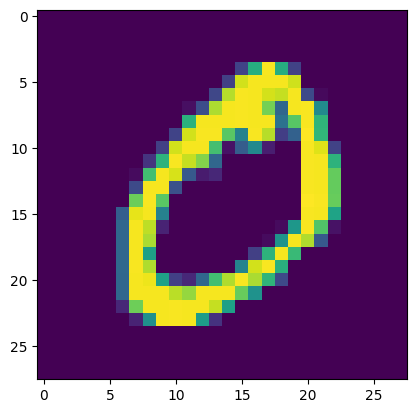

原始图像shape:  (28, 28)
L


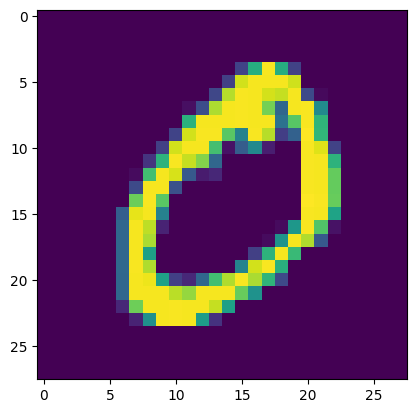

采样后图片shape:  (28, 28)


In [36]:
# 导入图像读取第三方库
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img_path = './work/example.png'
# 读取原始图像并显示
im = Image.open('./work/example.png')
print(im.mode)
plt.imshow(im)
plt.show()
# 将原始图像转为灰度图
im = im.convert('L')
print('原始图像shape: ', np.array(im).shape)
# 使用Image.ANTIALIAS方式采样原始图片
im = im.resize((28, 28), Image.LANCZOS)
print(im.mode)
plt.imshow(im)
plt.show()
print("采样后图片shape: ", np.array(im).shape)